In [1]:
#Data and numerical manipulations
import pandas as pd
import numpy as np
import csv

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Acquisition and pre-processing
from sklearn import datasets

#Import PCA function from pca library
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
DF = pd.read_csv("churn_clean.csv")
DF.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [3]:
#Select numerical variables of interest
my_data = DF.select_dtypes(exclude = 'object')
my_data.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [4]:
my_data.shape

(10000, 23)

In [5]:
my_data = DF.select_dtypes('number')
my_data.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
my_data.shape

(10000, 23)

In [7]:
#Select continuous variables of interest for pca
cv = my_data.drop(['Lat', 'Lng', 'Zip', 'CaseOrder', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
cv.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

In [8]:
cv.shape

(10000, 11)

In [9]:
#Handle missing values
cv.isnull().sum().sum()
#Handle null values in each column
cv.isna().sum()
#Handle null values in each row
cv.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Length: 10000, dtype: int64

In [10]:
import scipy.stats as stats 
cv.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


(array([7.243e+03, 1.178e+03, 7.340e+02, 4.610e+02, 2.090e+02, 1.050e+02,
        3.500e+01, 2.400e+01, 8.000e+00, 3.000e+00]),
 array([     0.,  11185.,  22370.,  33555.,  44740.,  55925.,  67110.,
         78295.,  89480., 100665., 111850.]),
 <BarContainer object of 10 artists>)

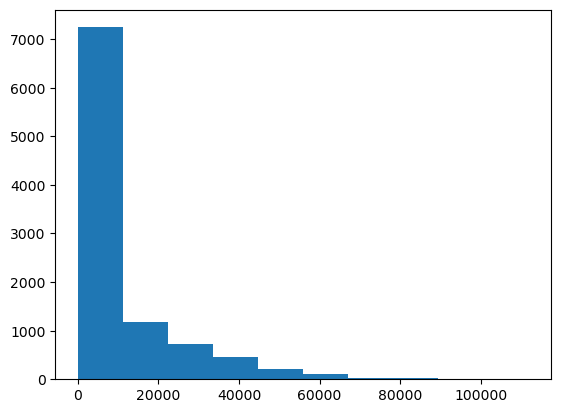

In [11]:
#Visualizations Histogram
from pandas import DataFrame
histplt, ex1 = plt.subplots()
ex1.hist(cv.iloc[::,0])

{'whiskers': [<matplotlib.lines.Line2D at 0x1906683de50>,
 'caps': [<matplotlib.lines.Line2D at 0x1906688f6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19066e5f890>],
 'medians': [<matplotlib.lines.Line2D at 0x190668a0d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1906683f550>],
 'means': []}

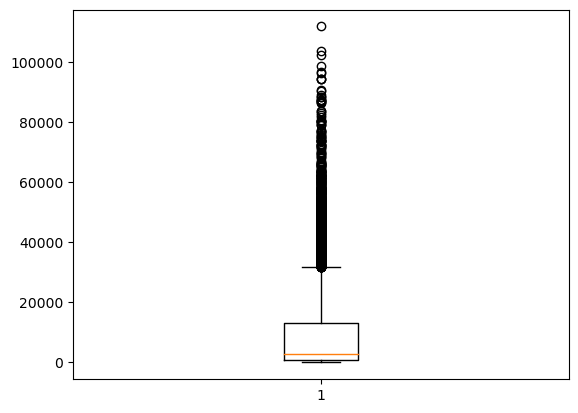

In [12]:
#Visualizations boxplots
boxplt, ex2 = plt.subplots()
ex2.boxplot(cv.iloc[::,0])

In [13]:
#Correlation heatmap
corr = cv.corr()

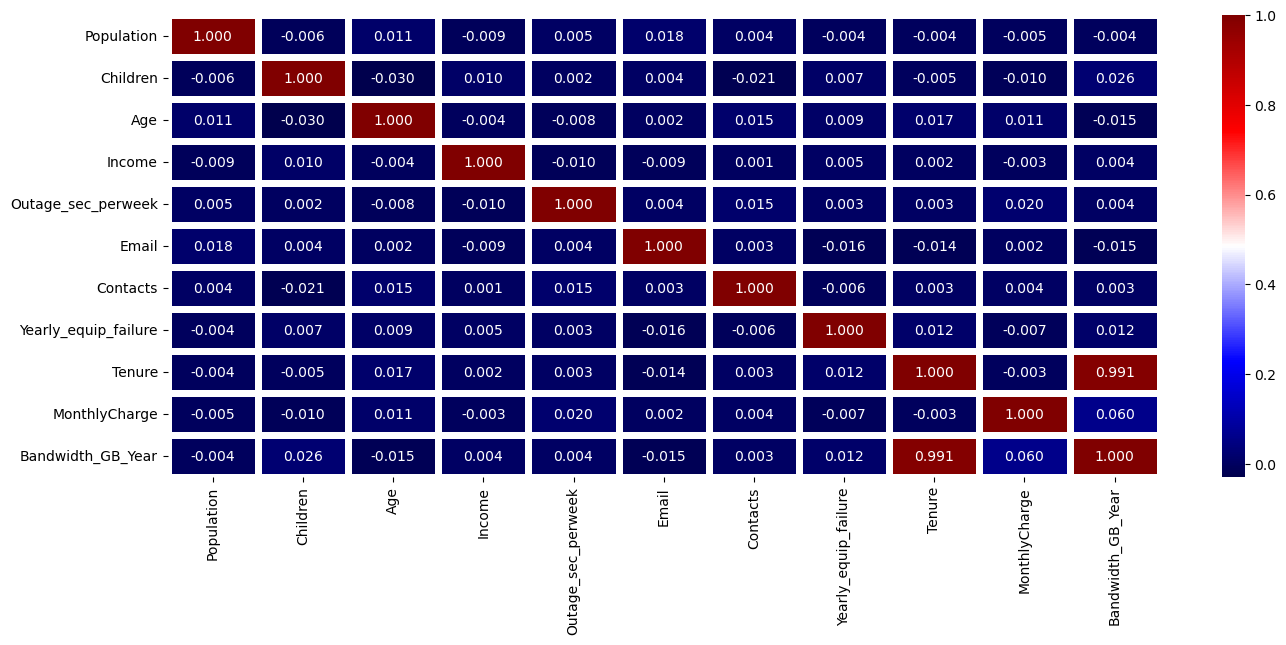

In [14]:
from sklearn import preprocessing
ax = plt.subplots(figsize=(16,6))
sns.heatmap(corr, cmap='seismic', linewidths=5, annot=True, fmt='.3f')
plt.show()

In [15]:
#Data normalization
robust = RobustScaler()
sd = robust.fit_transform(cv)
sd

array([[-0.23109413, -0.33333333,  0.41666667, ..., -0.53461297,
         0.08181679, -0.54601855],
       [ 0.60623492,  0.        , -0.72222222, ..., -0.63988949,
         1.23689002, -0.56982572],
       [ 0.06633146,  1.        , -0.08333333, ..., -0.36735607,
        -0.12405657, -0.28159143],
       ...,
       [-0.20148833,  0.        , -0.13888889, ...,  0.22378478,
         0.04097408,  0.20226104],
       [ 2.62787611,  0.        , -0.38888889, ...,  0.66586433,
         1.40134341,  0.73314055],
       [ 0.74975865,  0.        , -0.69444444, ...,  0.52127068,
         0.82295943,  0.59269989]])

In [16]:
cv_normalized=(cv-cv.mean())/cv.std()

In [17]:
cv_normalized

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673371,-0.972289,0.720889,-0.398758,-0.679944,-0.666248,-1.005801,0.946611,-1.048694,-0.003942,-1.138430
1,0.047769,-0.506567,-1.259894,-0.641922,0.570303,-0.005288,-1.005801,0.946611,-1.261938,1.630244,-1.185817
2,-0.417217,0.890602,-0.148723,-1.070831,0.252334,-0.996729,-1.005801,0.946611,-0.709904,-0.295210,-0.612107
3,0.284523,-0.506567,-0.245347,-0.740488,1.650423,0.986153,1.017537,-0.625832,-0.659491,-1.226460,-0.561829
4,0.110543,-0.972289,1.445566,0.009477,-0.623125,1.316634,1.017537,0.946611,-1.242489,-0.528059,-1.428113
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.631660,0.424879,-1.453141,0.564428,-0.196878,-0.005288,1.017537,-0.625832,1.273337,-0.294469,1.427227
9996,4.670744,0.890602,-0.245347,-0.201333,-1.095860,0.986153,1.017537,-0.625832,1.002690,0.811685,1.054142
9997,-0.647873,-0.506567,-0.245347,0.219026,-1.146141,-0.666248,-1.005801,-0.625832,0.487489,-0.061726,0.350966
9998,1.788885,-0.506567,-0.680153,-0.820547,0.695581,0.655673,0.005868,-0.625832,1.382949,1.862911,1.407643


In [18]:
cv_normalized.to_csv('d212PCAnormalized.csv', index=False)

In [19]:
#Create PCA 
pca = PCA(n_components=sd.shape[1])
pca.fit(cv_normalized)
cv_pca = pd.DataFrame(pca.transform(cv_normalized),     
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11'])

In [20]:
cv_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.532562,0.119506,-1.562038,0.136199,0.414976,-1.399508,0.191097,-0.130907,-0.527600,0.045654,-0.026621
1,-1.658936,0.130533,0.638269,-1.375589,0.723669,-1.271836,0.575567,0.474008,-0.826628,1.302639,-0.038358
2,-0.900477,1.191343,-0.193072,-0.495735,1.308733,-1.158641,-0.434048,-0.004835,0.466425,-0.297634,0.060822
3,-0.942266,-1.138033,1.264555,0.039042,0.394383,0.897966,-1.516612,-0.434373,-0.730130,-0.734869,0.130003
4,-1.929652,-1.434506,-0.984356,1.102888,0.459273,0.611668,0.333196,-1.448429,-0.347691,0.279126,-0.056538
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.897307,0.789505,0.484868,-0.372840,-1.157458,1.016519,-0.920497,-0.197202,0.091110,0.591022,0.081233
9996,1.434784,-1.508229,2.101513,2.366664,0.867393,1.420151,1.171609,2.015253,1.829817,1.784038,-0.026352
9997,0.578784,0.799265,-0.693525,0.471046,-1.131125,-1.009937,-0.023900,0.482007,-0.303899,0.032668,-0.086945
9998,2.002681,-1.589774,1.859988,-0.311384,0.215998,-0.461094,0.605249,1.201014,-0.039063,1.045715,-0.069396


In [21]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.18128814, 0.09612172, 0.09358777, 0.09260386, 0.09120816,
       0.09071975, 0.09012985, 0.08898161, 0.08764456, 0.08721758,
       0.000497  ])

In [22]:
pcomp = np.arange(pca.n_components_) + 1
pcomp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [23]:
pca_model = pca.fit_transform(sd)
pca_model

array([[-0.78404193, -0.31497112,  0.64957662, ...,  0.31458381,
        -0.50936902, -0.01326749],
       [ 0.05687948, -0.57655807, -0.18105194, ..., -0.81899375,
        -0.47091607, -0.01896519],
       [-0.49209513, -0.83661749,  0.67020178, ..., -0.08030681,
        -0.46427592,  0.03034416],
       ...,
       [-0.76934815,  0.22833895,  0.75542481, ..., -0.17267282,
        -0.4872952 , -0.0433595 ],
       [ 2.08969908, -0.72201641, -0.54733704, ..., -0.44077912,
        -0.01497256, -0.03452136],
       [ 0.23129653, -0.99902497, -1.23374449, ..., -0.72363486,
         0.00462694, -0.01682922]])

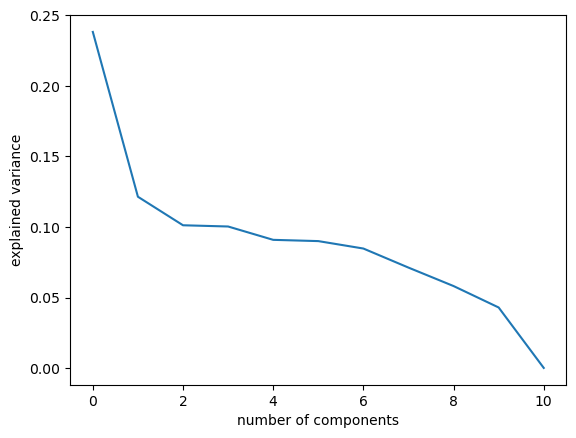

In [24]:
#Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [25]:
#Eigenvalues
cov_matrix = np.dot(cv_normalized.T, cv_normalized) / cv.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for
eigenvector in pca.components_]

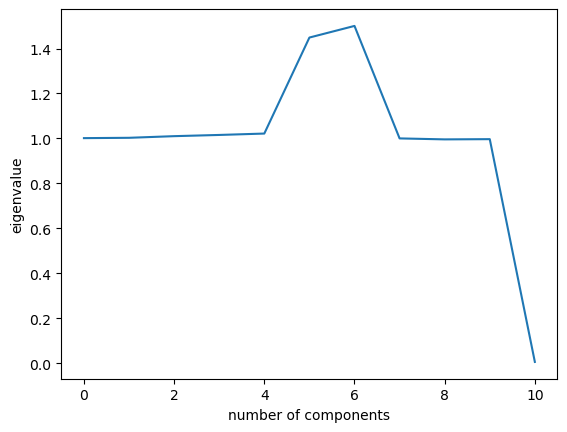

In [26]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.show() 

In [27]:
#Loadings
loadings = pd.DataFrame(pca.components_.T,
     columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10', 'PC11'],
     index=cv.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,0.999619,0.014462,0.020354,0.002711,0.005773,0.005870,0.003060,0.002263,-0.006851,-0.001559,-0.000148
Children,-0.005997,0.033446,-0.038371,0.002838,0.965003,0.100047,0.223682,-0.021171,0.069179,0.025140,-0.014988
Age,0.006975,-0.005950,0.004869,-0.011333,-0.069069,0.015289,-0.003346,0.049065,0.994894,-0.046379,0.019363
Income,-0.012884,0.996469,-0.065383,0.032722,-0.037618,-0.005573,0.001861,-0.007889,0.004526,-0.002075,-0.000562
Outage_sec_perweek,0.006195,-0.052494,-0.332928,0.924262,0.016371,-0.165826,-0.060822,-0.009899,0.014935,-0.017817,0.000185
Email,0.020485,-0.050098,-0.934673,-0.331682,-0.021640,0.068863,-0.079602,0.043174,-0.004757,-0.003188,0.000165
Contacts,0.002197,-0.000265,-0.008170,0.015600,-0.028127,0.000968,-0.007757,-0.009608,0.045239,0.998345,-0.000948
Yearly_equip_failure,-0.003714,0.011694,0.041953,0.023864,0.039854,0.007205,-0.063152,0.994805,-0.045881,0.012259,-0.000074
Tenure,-0.002571,0.006626,0.052353,0.060510,0.068125,0.437222,-0.537408,-0.043178,0.012454,-0.004846,-0.711964
MonthlyCharge,-0.004466,-0.013344,-0.047585,0.158982,-0.219397,0.732413,0.620056,0.040118,-0.023921,-0.003501,-0.032170


In [28]:
loadings.to_csv('d212PCAloadings.csv', index=False)

In [29]:
pc_contributions = list(pca.explained_variance_ratio_)
pc_names = list(loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

For PC1, the contribution is 23.821%
For PC2, the contribution is 12.148%
For PC3, the contribution is 10.128%
For PC4, the contribution is 10.04%
For PC5, the contribution is 9.095%
For PC6, the contribution is 9.006%
For PC7, the contribution is 8.48%
For PC8, the contribution is 7.13%
For PC9, the contribution is 5.823%
For PC10, the contribution is 4.305%
For PC11, the contribution is 0.024%
